<div align="center">

# Метод опорных векторов  
## (SVM, Support Vector Machine)  
### Классификация с максимальным отступом

</div>

---

**Цель SVM** — максимизация отступа (*margin*), который определяется как расстояние между разделяющей гиперплоскостью (границей решения) и ближайшими к ней точками обучающей выборки — **опорными векторами**.

**Идея** метода заключается в том, что более широкий отступ, как правило, ведёт к лучшей обобщающей способности модели. Модели с малым отступом склонны к переобучению.

---

### Основы SVM:

- **Переменная невязки** (*slack variable*):  
  При работе с **нелинейно разделимыми** данными допускаются ошибки классификации. Чтобы сохранить сходимость метода, линейные ограничения в задаче оптимизации смягчаются с помощью переменных невязки. Это позволяет SVM учитывать некоторые ошибки и наказывать их.

- **Параметр \( C \)**:  
  Этот гиперпараметр регулирует компромисс между максимизацией отступа и минимизацией ошибок классификации.  
  - Большие значения \( C \) → модель старается избегать ошибок, что может привести к переобучению.  
  - Малые значения \( C \) → модель допускает больше ошибок, но с более широким отступом, что улучшает обобщение.  
  Таким образом, \( C \) играет роль регуляризующего параметра.

---

### Логистическая регрессия vs SVM:

Обе модели часто дают схожие результаты в задачах классификации, но основываются на разных принципах:

- **Логистическая регрессия** максимизирует **условную вероятность** (функцию правдоподобия), что делает её чувствительной к выбросам.
- **SVM** концентрируется только на **опорных векторах**, то есть тех точках, которые лежат ближе всего к границе решения.

Логистическая регрессия проще с математической точки зрения и лучше интерпретируется, тогда как SVM может быть более устойчивым в задачах с чёткими разделяющими границами.


In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [126]:
# 1) Загрузка всех образцов Iris
iris   = datasets.load_iris()
X_all_2  = iris.data        # shape (150, 4)
y_all_2  = iris.target      # shape (150,)

# 2) Выбор двух признаков: petal length (индекс 2) и petal width (индекс 3)
X_23   = X_all_2[:, [2, 3]]

# 3) Стандартизация признаков
scaler = StandardScaler()
X_std_2  = scaler.fit_transform(X_23)

# Делим X_std_2 и y_all_2 на train и test
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X_std_2, y_all_2, np.arange(len(y_all_2)),
    test_size=0.3,          # 30% тест
    random_state=1,
    stratify=y_all_2        # сохраняем пропорции классов
)


In [127]:
# Обучаем модель
svm = SVC(kernel = 'linear',
         C = 1.0,
         random_state = 1)
svm.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [128]:
# График визуализации областей принятия решений SVM
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # Настройка генератора меток и цветной карты
    markers = ('o', 's', '^', 'v', '<')
    colors  = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap    = ListedColormap(colors[:len(np.unique(y))])

    # Построение решающей поверхности
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution)
    )
    Z = classifier.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Отрисовка всех образцов
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=f'Класс {cl}',
            edgecolor='black'
        )

    # Подсветка тестовых образцов, если переданы индексы
    if test_idx is not None:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(
            X_test[:, 0], X_test[:, 1],
            facecolors='none',
            edgecolors='black',
            alpha=1.0,
            linewidth=1,
            marker='o',
            s=100,
            label='Тестовый набор'
        )

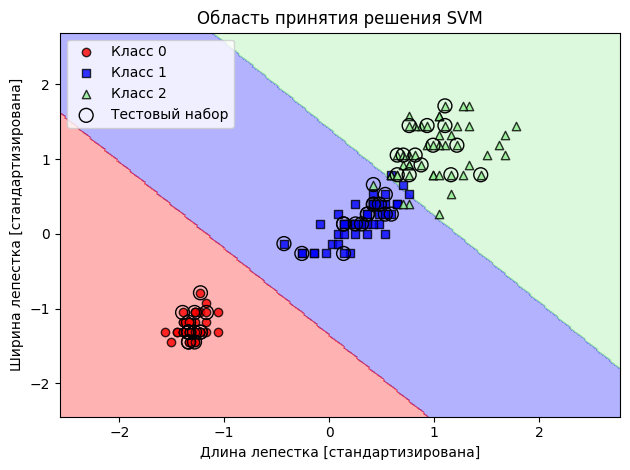

In [129]:
plot_decision_regions(
    X=np.vstack((X_train, X_test)),
    y=np.hstack((y_train, y_test)),
    classifier=svm,
    test_idx=range(len(X_train), len(X_train) + len(X_test))
)
plt.xlabel('Длина лепестка [стандартизирована]')
plt.ylabel('Ширина лепестка [стандартизирована]')
plt.title('Область принятия решения SVM')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [130]:
print("Коэффициенты модели:\n", svm.coef_)
print("Смещения (intercepts):\n", svm.intercept_)
print("Accuracy на test : {:.2f}".format(svm.score(X_test,  y_test)))

Коэффициенты модели:
 [[-1.25685595 -1.08539579]
 [-0.67753699 -0.55679033]
 [-2.20002722 -1.89989873]]
Смещения (intercepts):
 [-1.46924722 -0.30134933  2.67999037]
Accuracy на test : 0.98


Как видно на графике, SVM имеет чуть лучше разделимость гиперплоскотью данных Iris, чем логистическая регрессия.

Классы LogisticRegression и SVC из библиотеки scikit-learn могут использовать высокоэффективные C/C++-библиотеки **LIBLINEAR** и **LIBSVM** для ускоренного обучения моделей. Это особенно полезно при работе с большим числом линейных классификаторов. Однако при слишком больших данных, которые не помещаются в память, scikit-learn предлагает альтернативу — класс **SGDClassifier**, реализующий стохастический градиентный спуск и поддерживающий онлайн-обучение через метод `partial_fit`. С его помощью можно реализовать персептрон, логистическую регрессию и SVM.


## Решение нелинейных задач с использованием ядерного метода SVM

---



Простой пример на созданных синтетических наборах данных, который показывает типичную проблему нелинейной классификации.

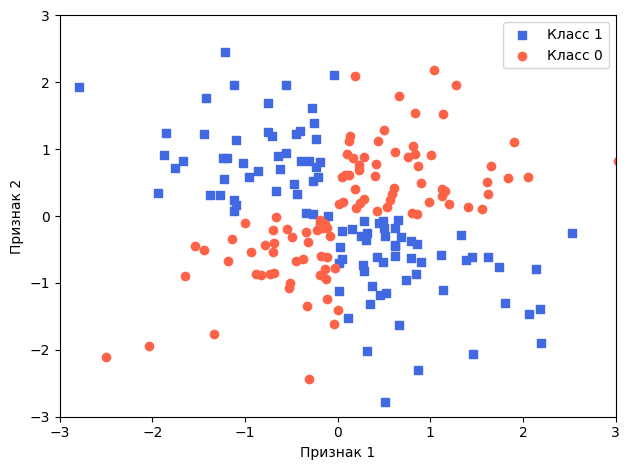

In [131]:
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                      X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)

plt.scatter(X_xor[y_xor == 1, 0],
           X_xor[y_xor == 1, 1],
           c = 'royalblue', marker = 's',
           label = 'Класс 1')
plt.scatter(X_xor[y_xor == 0, 0],
           X_xor[y_xor == 0, 1],
           c = 'tomato', marker = 'o',
           label = 'Класс 0')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

Очевидно, что здесь не получится разделить линейной гиперплоскостью. Идея ядерного SVM, заключается в создание нелинейных комбинаций исходных признаков для проецирования их в многомерное пространство с помощью функции отображения `ф`, где данные становятся линейно разделимыми.

Чтобы решить нелинейную задачу, используя SVM, мы должны перенести обучающие
данные в многомерное пространство признаков с помощью функции отображения `ф`
и обучить линейную модель SVM классифицировать данные в этом новом пространстве признаков. Затем мы можем применить ту же функцию отображения `ф` для преобразования новых (незнакомых) данных и классифицировать их с помощью линейной модели SVM.
Однако проблема с отображением данных в многомерное пространство заключается
в том, что извлечение новых признаков требует очень больших вычислительных ресурсов, особенно если мы имеем дело с многомерными данными. Здесь в игру вступает так
называемый ядерный трюк (kernel trick).

В SVM вместо явного преобразования данных в другое пространство используется **ядерная функция (kernel)**, которая вычисляет скалярное произведение преобразованных точек без самого преобразования. Одна из самых популярных — **гауссово (RBF) ядро**, которое измеряет сходство между объектами:
$$
k(x^{(i)}, x^{(j)}) = \exp\left(-\gamma \| x^{(i)} - x^{(j)} \|^2 \right)
$$
Здесь параметр $\boldsymbol{\gamma}$ регулирует радиус влияния. Такое ядро позволяет эффективно обучать SVM даже при нелинейных границах, интерпретируя расстояние как степень схожести между объектами.

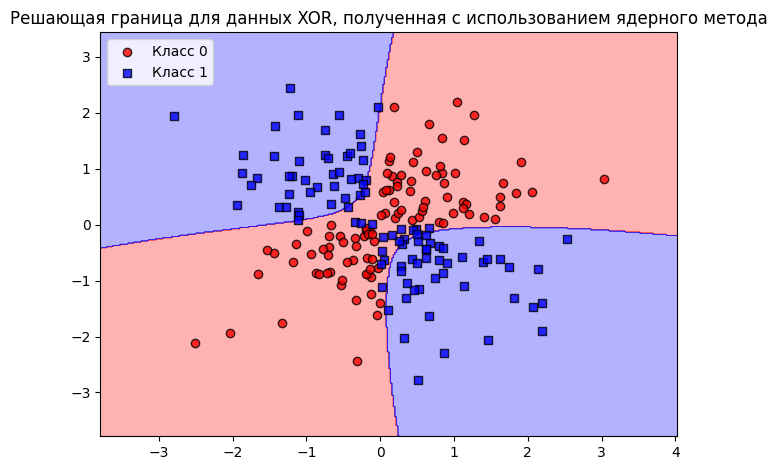

In [132]:
svm2 = SVC(kernel = 'rbf',
          random_state = 1,
          gamma = 0.10,
          C = 10.0)
svm2.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier = svm2)
plt.title('Решающая граница для данных XOR, полученная с использованием ядерного метода')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

Параметр $\boldsymbol{\gamma}$ для которого мы установили значение `0.1`, можно понимать как параметр отсечки для гауссовской сферы. Выбрав слишком большое значение, мы увеличим влияние или охват обучающих примеров, что приведет к более жесткой и неровной разделяющей границе. 

Чтобы лучше понять $\boldsymbol{\gamma}$ стоит применить SVM с ядром RBF к набору данных `Iris`.

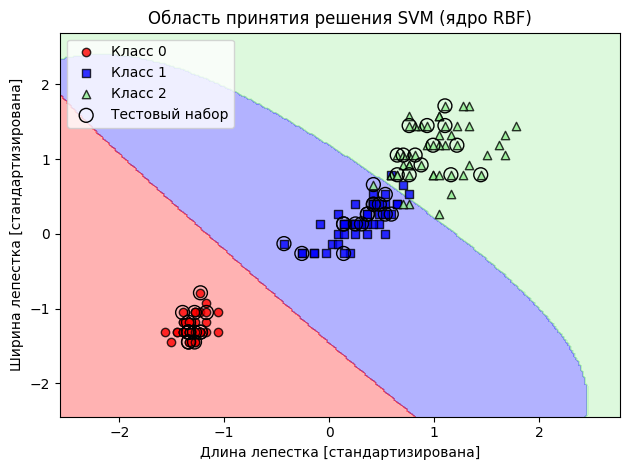

In [133]:
# Обучаем модель
svm3 = SVC(kernel = 'rbf',
         C = 1.0,
         gamma = 0.2,
         random_state = 1)
svm3.fit(X_train, y_train)

# График области принятия решений
plot_decision_regions(
    X=np.vstack((X_train, X_test)),
    y=np.hstack((y_train, y_test)),
    classifier=svm3,
    test_idx=range(len(X_train), len(X_train) + len(X_test))
)
plt.xlabel('Длина лепестка [стандартизирована]')
plt.ylabel('Ширина лепестка [стандартизирована]')
plt.title('Область принятия решения SVM (ядро RBF)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [134]:
print("Смещения (intercepts):\n", svm3.intercept_)
print("Accuracy на test : {:.2f}".format(svm3.score(X_test,  y_test)))

Смещения (intercepts):
 [ 0.01336294 -0.04704556 -0.13909566]
Accuracy на test : 0.98


Посколько мы выбрали относительно небольшое значение **gamma**, полученная разделяющая граница SVM-модели с ядром `RBF`, будет относительно мягкой.

Но, что будет если увеличить этот параметр, как **gamma** повлияет на границы?

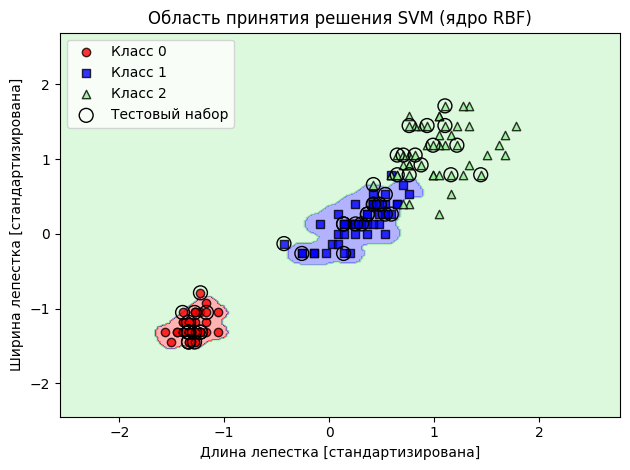

In [135]:
# Обучаем модель
svm4 = SVC(kernel = 'rbf',
         C = 1.0,
         gamma = 100.0,
         random_state = 1)
svm4.fit(X_train, y_train)

# График области принятия решений
plot_decision_regions(
    X=np.vstack((X_train, X_test)),
    y=np.hstack((y_train, y_test)),
    classifier=svm4,
    test_idx=range(len(X_train), len(X_train) + len(X_test))
)
plt.xlabel('Длина лепестка [стандартизирована]')
plt.ylabel('Ширина лепестка [стандартизирована]')
plt.title('Область принятия решения SVM (ядро RBF)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [136]:
print("Смещения (intercepts):\n", svm4.intercept_)
print("Accuracy на test : {:.2f}".format(svm4.score(X_test,  y_test)))

Смещения (intercepts):
 [-0.35257351 -0.44058548 -0.12436747]
Accuracy на test : 0.93


Теперь можно видеть, что при относительном большом значении **gamma** разделяющая граница вокруг классов `0` и `1` становится намного более узкой.

Хотя модель очень точно соответсвует обучающему набору данных, такой классификатор вероятно, будет иметь высокую ошибку обобщения на незнакомых данных. Это говорит о том, что параметр **gamma** играет важную роль в борьбе с переобучением или дисперсией, когда алгоритм слишком чувствителен к колебаниям в обучающем наборе данных.
